In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/multiclass-weather-dataset/dataset/test.csv
/kaggle/input/multiclass-weather-dataset/dataset/cloudy/cloudy88.jpg
/kaggle/input/multiclass-weather-dataset/dataset/cloudy/cloudy167.jpg
/kaggle/input/multiclass-weather-dataset/dataset/cloudy/cloudy78.jpg
/kaggle/input/multiclass-weather-dataset/dataset/cloudy/cloudy80.jpg
/kaggle/input/multiclass-weather-dataset/dataset/cloudy/cloudy2.jpg
/kaggle/input/multiclass-weather-dataset/dataset/cloudy/cloudy89.jpg
/kaggle/input/multiclass-weather-dataset/dataset/cloudy/cloudy99.jpg
/kaggle/input/multiclass-weather-dataset/dataset/cloudy/cloudy256.jpg
/kaggle/input/multiclass-weather-dataset/dataset/cloudy/cloudy9.jpg
/kaggle/input/multiclass-weather-dataset/dataset/cloudy/cloudy185.jpg
/kaggle/input/multiclass-weather-dataset/dataset/cloudy/cloudy208.jpg
/kaggle/input/multiclass-weather-dataset/dataset/cloudy/cloudy44.jpg
/kaggle/input/multiclass-weather-dataset/dataset/cloudy/cloudy269.jpg
/kaggle/input/multiclass-weather-dataset/d

In [22]:
import os
os.listdir("../input/multiclass-weather-dataset/dataset")

['cloudy', 'sunrise', 'alien_test', 'shine', 'test.csv', 'foggy', 'rainy']

In [23]:

import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Conv2D,Dense

In [24]:
def load_images(path):
    imgs = []
    label = []
    l1 = os.listdir(path)
    for i in l1:
        if i!='test.csv' and i!='alien_test':
            l2 = os.listdir(path+'/'+i)
            for j in l2:
                img = Image.open(path+i+'/'+j).convert('RGB')
                img = img.resize(size=(32,32))
                #img = img.convert('L')
                imgs.append(np.array(img))
                label.append(i)
                del img
#     %matplotlib inline 
#     plt.figure(figsize=(10, 10))
#     for i in range(20):
#         plt.subplot(5,4,i+1)
#         plt.imshow(imgs[i], cmap="gray")
#         plt.axis('off')
#     plt.show()
    return np.array(imgs),label


In [25]:
x,y=load_images("../input/multiclass-weather-dataset/dataset/")

In [26]:
print(x.shape)

(1500, 32, 32, 3)


In [27]:
len(y)

1500

In [28]:
target = pd.Series(y,dtype='category')
target

0       cloudy
1       cloudy
2       cloudy
3       cloudy
4       cloudy
         ...  
1495     rainy
1496     rainy
1497     rainy
1498     rainy
1499     rainy
Length: 1500, dtype: category
Categories (5, object): ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']

In [29]:
target.value_counts()

sunrise    350
cloudy     300
foggy      300
rainy      300
shine      250
dtype: int64

In [30]:
t = target.cat.codes
t

0       0
1       0
2       0
3       0
4       0
       ..
1495    2
1496    2
1497    2
1498    2
1499    2
Length: 1500, dtype: int8

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,t,test_size=0.2,random_state=True)

In [32]:
x_train.shape

(1200, 32, 32, 3)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPool2D,Conv2D
model=Sequential()
model.add(Conv2D(32,activation="relu",kernel_size=3,input_shape=x_train.shape[1:]))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,activation="relu",kernel_size=3))
model.add(MaxPool2D(2,2))
model.add(Conv2D(128,activation='relu',kernel_size=3))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(1000,activation='relu'))
model.add(Dense(5,activation='softmax'))





In [34]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 128)       

In [35]:
model.fit(x_train,y_train,epochs=25)

Epoch 1/25
38/38 [==============================] - 2s 31ms/step - loss: 6.1561 - accuracy: 0.4858
Epoch 2/25
38/38 [==============================] - 1s 31ms/step - loss: 0.8469 - accuracy: 0.6625
Epoch 3/25
38/38 [==============================] - 1s 30ms/step - loss: 0.7159 - accuracy: 0.7417
Epoch 4/25
38/38 [==============================] - 1s 31ms/step - loss: 0.6864 - accuracy: 0.7400
Epoch 5/25
38/38 [==============================] - 1s 31ms/step - loss: 0.5675 - accuracy: 0.7967
Epoch 6/25
38/38 [==============================] - 1s 32ms/step - loss: 0.4820 - accuracy: 0.8150
Epoch 7/25
38/38 [==============================] - 1s 30ms/step - loss: 0.4146 - accuracy: 0.8550
Epoch 8/25
38/38 [==============================] - 2s 40ms/step - loss: 0.3506 - accuracy: 0.8725
Epoch 9/25
38/38 [==============================] - 1s 30ms/step - loss: 0.3158 - accuracy: 0.8833
Epoch 10/25
38/38 [==============================] - 1s 31ms/step - loss: 0.2914 - accuracy: 0.8850
Epoch 11/

In [37]:
_,acc = model.evaluate(x_test,y_test)
print("Test Accuracy : ",acc*100)

10/10 [==============================] - 0s 12ms/step - loss: 0.8448 - accuracy: 0.8000
Test Accuracy :  80.0000011920929


In [39]:
def names(number):
    if number==0:
        return "cloudy"
    elif number==1:
        return "foggy"
    elif number==2:
        return "rainy"
    elif number==3:
        return "shine"
    elif number==4:
        return "sunrise"


In [ ]:
from matplotlib.pyplot import imshow
def Prediction(im):
    x = np.array(im.resize((32,32)))
    x = x.reshape(1,32,32,3)
    res = model.predict_on_batch(x)
    classification = np.where(res == np.amax(res))[1][0]
    imshow(im)
    print(str(res[0][classification]*100) + '% Confidence ' + names(classification))


100.0% Confidence sunrise


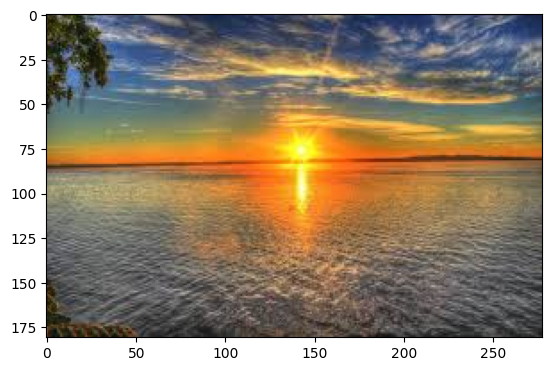

In [45]:

test_img = Image.open("/kaggle/input/multiclass-weather-dataset/dataset/sunrise/sunrise20.jpg").convert('RGB')
Prediction(test_img)

In [47]:
model.save('wcv.h5')